# Regression



### 1.Use linear_model.LinearRegression()

#### 1-1 On sythetic dataset with noise

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#x range from 60 degree to 300 degree
X = np.array([i*np.pi/180 for i in range(60,300,4)])

#Y = sin(x) + noise
y = np.sin(X) + np.random.normal(0,0.15,len(X))

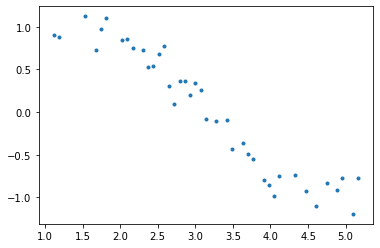

In [3]:
# train-test split - Also used in PS1
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.33, random_state=42)


# visualization of training Data
plt.plot(X_tr,y_tr,'.')

In [4]:
# Reshaping to be column vectors - Must assign the reshaped vars -- Piazza Question
X_tr,y_tr,X_te,y_te = X_tr.reshape(-1,1),y_tr.reshape(-1,1),X_te.reshape(-1,1),y_te.reshape(-1,1)

In [5]:
#Define the Model to be used
regr = LinearRegression()
# Arguments for the Linear Regression Model
    # 1.fit_intercept:bool, default=True  
    # 2.normalize:bool, default=False
    # 3.copy_X:bool, default=True
    # 4.n_jobs:int, default=None


#Train the linear model with the X & y training data using the ".fit(X_TrainingData,y_TrainingData)" function
regr.fit(X_tr, y_tr) 

LinearRegression()

In [6]:
#print the coefficient
print('Coefficients: \n', regr.coef_)

# The mean square error
print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_te) - y_te) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_te, y_te))

Coefficients: 
 [[-0.62090926]]
Residual sum of squares: 0.06
Variance score: 0.93


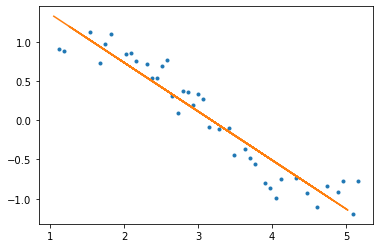

In [7]:
plt.plot(X_tr,y_tr,'.')
plt.plot(X_te, regr.predict(X_te))

#### 1-2 On real dataset

Coefficients: 
 [972.87627375]
Residual sum of squares: 3934.07
Variance score: 0.32


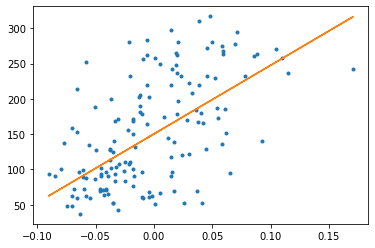

In [8]:
#On real data set 
from sklearn import datasets, linear_model

#Load a prebuilt dataset from sklearn.datasets
diabetes = datasets.load_diabetes()


# choose one feature from the dataset
diabetes_X = diabetes.data[:, np.newaxis,2]

#Uncomment and print both datasets to see the effect of 'np.newaxis', it reshapes the data to a column vector.
#print(diabetes.data[:,2])
#print(diabetes_X)

# training set and test set
dia_X_tr, dia_X_te, dia_y_tr, dia_y_te = train_test_split(diabetes_X, diabetes.target, test_size=0.33, random_state=42)

#Define the model
regr_real = linear_model.LinearRegression()

#Train the model with the training data
regr_real.fit(dia_X_tr, dia_y_tr)


#Print the linear coefficent
print('Coefficients: \n', regr_real.coef_)

#Print the sum of squares
print("Residual sum of squares: %.2f"
      % np.mean((regr_real.predict(dia_X_te) - dia_y_te) ** 2))

#Print the Variance score
print('Variance score: %.2f' % regr_real.score(dia_X_te, dia_y_te))


plt.plot(dia_X_te, dia_y_te,".")
plt.plot(dia_X_te, regr_real.predict(dia_X_te))


plt.show()


### 2.Use sklearn.metrics: mean_squared_error, R2 score to evaluate performance

#### 2-1 Mean square error

In [9]:
#using the first dataset we generate
from sklearn.metrics import mean_squared_error

In [10]:
#synthetic dataset
mse = mean_squared_error(y_te, regr.predict(X_te),sample_weight=None, multioutput='uniform_average')
print(mse)

0.05630404318042024


In [11]:
#real dataset
mse_dia = mean_squared_error(dia_y_te, regr_real.predict(dia_X_te),sample_weight=None, multioutput='uniform_average')
print(mse_dia)

3934.0672763273196


#### 2-2 R2 score

In [12]:
from sklearn.metrics import r2_score

In [13]:
#synthetic dataset
R2 = r2_score(y_te,regr.predict(X_te),sample_weight=None, multioutput='uniform_average')
print(R2)

0.9340188991182494


In [14]:
#real dataset
R2_dia = r2_score(dia_y_te,regr_real.predict(dia_X_te),sample_weight=None, multioutput='uniform_average')
print(R2_dia)

0.31643968376857323


#### 2-3 Plotting train error and test error

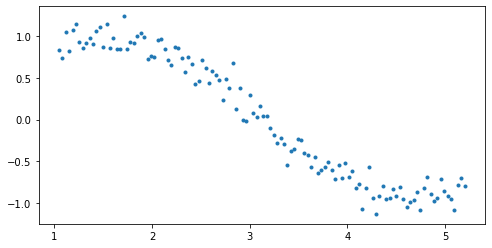

In [15]:
X_2 = np.array([i*np.pi/180 for i in range(60,300,2)])
y_2 = np.sin(X_2) + np.random.normal(0,0.15,len(X_2))
    
plt.figure(figsize=(8,4))    
plt.plot(X_2, y_2, linestyle='', marker='.')
plt.show()

In [24]:
train_error = []
test_error = []

In [25]:
for i in range(1,7,1):
  te_size = i*0.1
# Variable Train Test Split - Change the size of the testing set
  X_tr_2, X_te_2, y_tr_2, y_te_2 = train_test_split(X_2, y_2, test_size=te_size, random_state=42)
#Reshape into column vectors
  X_tr_2, y_tr_2, X_te_2, y_te_2 = X_tr_2.reshape(-1,1),y_tr_2.reshape(-1,1),X_te_2.reshape(-1,1),y_te_2.reshape(-1,1)
#Define a Model
  regr_2 = LinearRegression()
#Train the model using ".fit" and the trainging Data
  regr_2.fit(X_tr_2, y_tr_2)
#MSE for the Training Set
  mse_tr = mean_squared_error(y_tr_2, regr_2.predict(X_tr_2)) 
#MSE for the Testing Set
  mse_te = mean_squared_error(y_te_2, regr_2.predict(X_te_2)) 
#Collect the errors in a list. 
  train_error.append(mse_tr)
  test_error.append(mse_te)

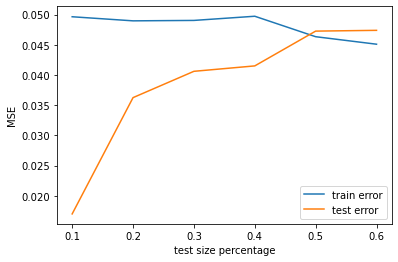

In [26]:
test_size = [i*0.1 for i in range(1,7)]

#Plot the training error as a function of test set size
plt.plot(test_size, train_error,label='train error') 
#Plot the testing error as a function of test set size
plt.plot(test_size, test_error,label='test error')


plt.xlabel('test size percentage')
plt.ylabel('MSE')
plt.legend()
plt.show()